In [25]:
import pandas as pd
import xlrd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline       
#pd.options.display.max_columns = 100

In [4]:
total_data = pd.read_csv("clean_data_v3.csv")

/Applications/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Studying how does Patient Disposition (PD) affect Discharge Charges
# First, show unique values in the column of PD
PD_column = total_data["Patient Disposition"]

In [6]:
Type_PD = PD_column.unique()

In [7]:
# Find the number of different types of PD - 19
# In fact, our 40th column is the PD Indicator from 0 - 18, specific correspondances can be found on Data Cleaning Doc\
# In short, the more patients the type has, the larger the indicator is. For example, home or self care has the largest
# patient amount, its indicator is 18
len(Type_PD)

19

In [8]:
total_data.head(20);

In [9]:
# The number of patients admitted for each type of PD
total_data.groupby("Patient Disposition").size().sort_values(ascending=False)

Patient Disposition
Home or Self Care                        1354596
Home w/ Home Health Services              246006
Skilled Nursing Home                      201246
Expired                                    45613
Inpatient Rehabilitation Facility          37563
Short-term Hospital                        36410
Left Against Medical Advice                25723
Hospice - Medical Facility                  8541
Hospice - Home                              7724
Psychiatric Hospital or Unit of Hosp        7643
Facility w/ Custodial/Supportive Care       5408
Another Type Not Listed                     3956
Medicare Cert Long Term Care Hospital       3374
Court/Law Enforcement                       2552
Cancer Center or Children's Hospital        2294
Hosp Basd Medicare Approved Swing Bed       1500
Federal Health Care Facility                 505
Medicaid Cert Nursing Facility               138
Critical Access Hospital                      34
dtype: int64

In [10]:
# Get average charges for each type of PD
total_data.groupby("Patient Disposition")["Total Charges"].mean().sort_values()

Patient Disposition
Left Against Medical Advice               16812.241326
Hosp Basd Medicare Approved Swing Bed     20699.313420
Home or Self Care                         23148.125127
Court/Law Enforcement                     33052.423225
Facility w/ Custodial/Supportive Care     34538.020244
Federal Health Care Facility              35394.437485
Short-term Hospital                       38933.496353
Another Type Not Listed                   46971.585104
Psychiatric Hospital or Unit of Hosp      49610.646819
Home w/ Home Health Services              51285.805424
Hospice - Home                            51533.517751
Critical Access Hospital                  53026.354118
Skilled Nursing Home                      60986.239312
Medicaid Cert Nursing Facility            61125.422609
Hospice - Medical Facility                61699.120180
Medicare Cert Long Term Care Hospital     73491.367813
Inpatient Rehabilitation Facility         82677.921394
Expired                                   836

In [11]:
total_data.groupby("Patient Disposition Indicator")["Total Charges"].mean().sort_values(ascending=False)

Patient Disposition Indicator
4     132829.447803
15     83672.944494
14     82677.921394
6      73491.367813
11     61699.120180
1      61125.422609
16     60986.239312
0      53026.354118
10     51533.517751
17     51285.805424
9      49610.646819
7      46971.585104
13     38933.496353
2      35394.437485
8      34538.020244
5      33052.423225
18     23148.125127
3      20699.313420
12     16812.241326
Name: Total Charges, dtype: float64

In [12]:
# Let's look at the variance (variability) of Mean Charges of each type among the 19 types of PD
total_data.groupby("Patient Disposition Indicator")["Total Charges"].mean().std() #27245.975325785537

27245.975325785537

In [13]:
# Ivy's: count how many hospitals in total in NY State
total_data["Facility ID"].nunique()

218

In [14]:
#Ivy
total_data.groupby("Facility ID")["Facility Name"].nunique(); 

In [22]:
PD_data = pd.DataFrame(total_data.groupby("Patient Disposition")["Total Charges"].\
                           mean().sort_values(ascending=False)).reset_index()
PD_data.head()

,Patient Disposition,Total Charges
0,Cancer Center or Children's Hospital,132829.447803
1,Expired,83672.944494
2,Inpatient Rehabilitation Facility,82677.921394
3,Medicare Cert Long Term Care Hospital,73491.367813
4,Hospice - Medical Facility,61699.120180


In [33]:
PD_APR_Severity = pd.DataFrame(total_data.groupby("Patient Disposition")\
                               ["APR Severity of Illness Code"].mean().sort_values(ascending=False))
PD_APR_Severity.head()

,APR Severity of Illness Code
Patient Disposition,
Expired,3.565014
Hospice - Medical Facility,3.350310
Hospice - Home,3.038322
Medicaid Cert Nursing Facility,2.956522
Medicare Cert Long Term Care Hospital,2.877001


In [37]:
PD_APR_Severity.head()

,APR Severity of Illness Code
Patient Disposition,
Expired,3.565014
Hospice - Medical Facility,3.350310
Hospice - Home,3.038322
Medicaid Cert Nursing Facility,2.956522
Medicare Cert Long Term Care Hospital,2.877001


In [36]:
PD_data.head()

,Total Charges,Patient Disposition,0
1,132829.447803,Cancer Center or Children's Hospital,2294
4,83672.944494,Expired,45613
12,82677.921394,Inpatient Rehabilitation Facility,37563
15,73491.367813,Medicare Cert Long Term Care Hospital,3374
11,61699.120180,Hospice - Medical Facility,8541


In [39]:
#create a dataframe to store all county-level data
#add mean charges
PD_data = pd.DataFrame(total_data.groupby("Patient Disposition")["Total Charges"].\
                           mean().sort_values(ascending=False))
PD_patient = pd.DataFrame(total_data.groupby("Patient Disposition").size()).reset_index()
PD_APR_Severity = pd.DataFrame(total_data.groupby("Patient Disposition")\
                               ["APR Severity of Illness Code"].mean().sort_values(ascending=False))
#add number of patients
PD_data = pd.merge(PD_data,PD_patient,left_index=True,right_on='Patient Disposition')
PD_data = pd.merge(PD_APR_Severity,PD_data,left_index=True,right_on='Patient Disposition')
PD_data.rename(columns={0:'Num_of_patients'},inplace=True)
PD_data.rename(columns={'Total Charges':'Avg Charges'},inplace=True)
PD_data.rename(columns={'APR Severity of Illness Code':"Average Severity"},inplace=True)
PD_data.set_index("Patient Disposition",inplace=True)

PD_data.head()

,Average Severity,Avg Charges,Num_of_patients
Patient Disposition,,,
Expired,3.565014,83672.944494,45613
Hospice - Medical Facility,3.350310,61699.120180,8541
Hospice - Home,3.038322,51533.517751,7724
Medicaid Cert Nursing Facility,2.956522,61125.422609,138
Medicare Cert Long Term Care Hospital,2.877001,73491.367813,3374


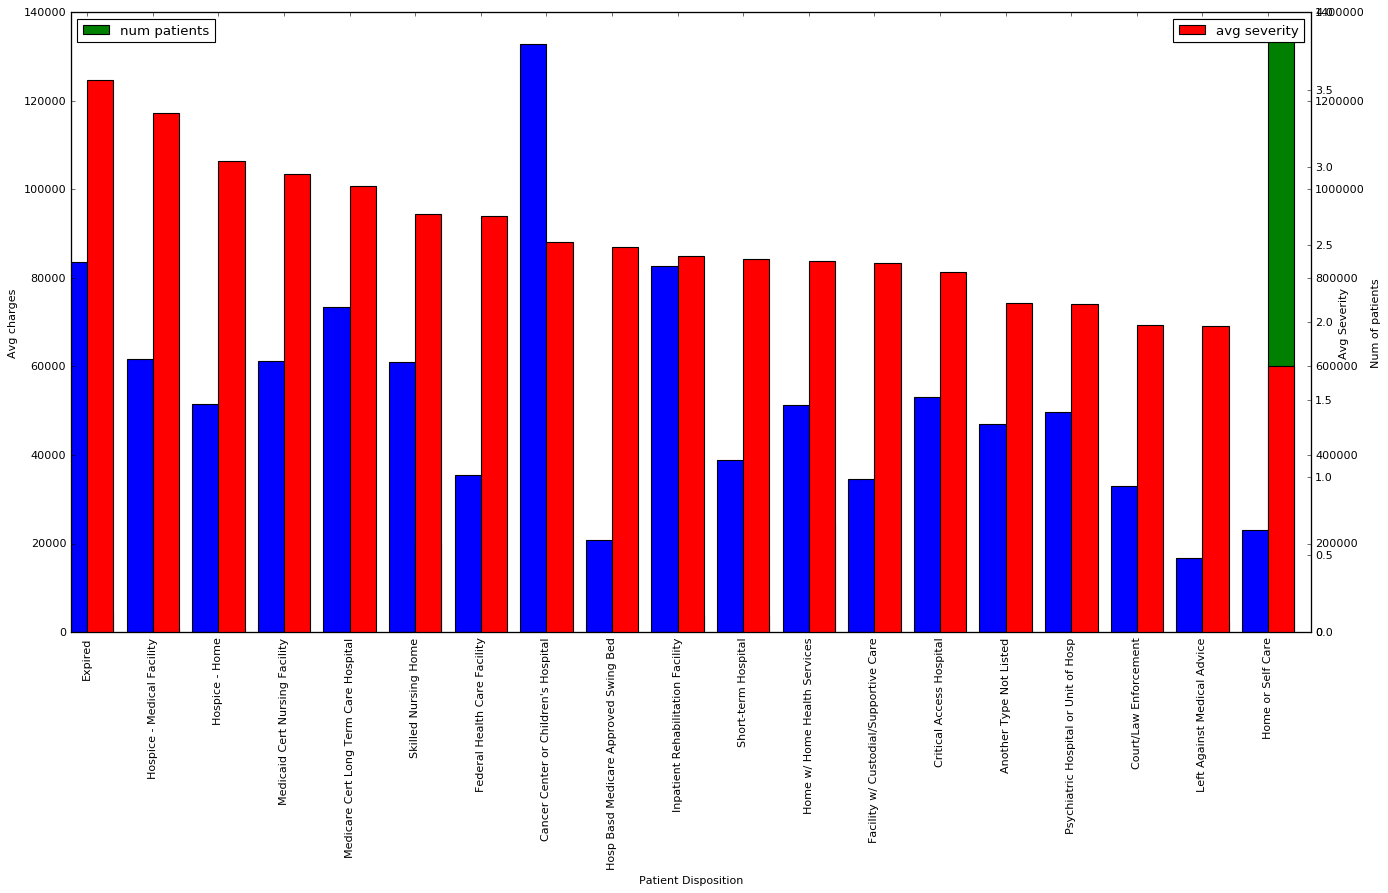

In [40]:
#plot number of patients and average charge in same plot for each PD
fig, ax = plt.subplots(figsize=(20,10))
ax2 = ax.twinx()
ax3 = ax.twinx()
width = 0.4
PD_data['Avg Charges'].plot(kind='bar',ax=ax,position=1,width=width,label='avg charges',legend=True)
PD_data['Num_of_patients'].plot(kind='bar',ax=ax2,color='g',position=0,width=width,label='num patients',legend=True)
PD_data['Average Severity'].plot(kind='bar',ax=ax3,color='r',position=0,width=width,label='avg severity',legend=True)
ax.set_ylabel('Avg charges')
ax2.set_ylabel('Num of patients')
ax3.set_ylabel('Avg Severity')
plt.legend()

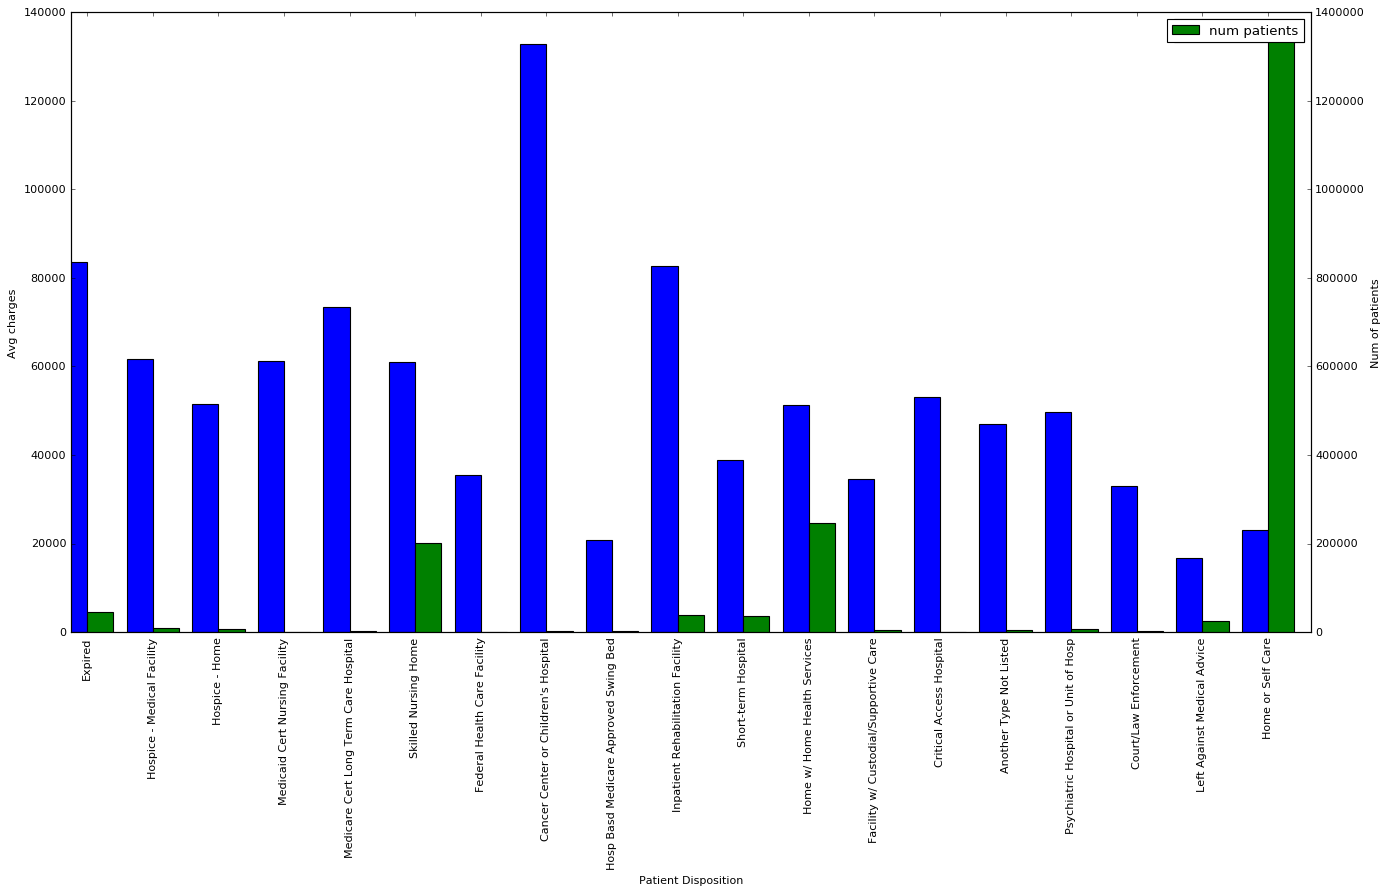

In [41]:
#plot number of patients and average charge in same plot for each PD
fig, ax = plt.subplots(figsize=(20,10))
ax2 = ax.twinx()

width = 0.4
PD_data['Avg Charges'].plot(kind='bar',ax=ax,position=1,width=width,label='avg charges',legend=True)
PD_data['Num_of_patients'].plot(kind='bar',ax=ax2,color='g',position=0,width=width,label='num patients',legend=True)

ax.set_ylabel('Avg charges')
ax2.set_ylabel('Num of patients')

plt.legend()